Lo primero que tenemos que hacer es redudir el tamaño del dataset. Actualmente el conjunto de entrenamiento tiene un tamaño de 4.36 Gb, vamos a intentar reducirlo. Para ello vamos a transformar todas las imágenes del dataset a un ancho de 256 manteniendo las relación de aspecto con la altura de ésta.

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
from skimage.transform import resize
from tqdm import tqdm
import PIL
import cv2


Lo primero que debemos hacer es reescalar la imágenes a 256 de ancho manteniendo su relación de aspecto

In [2]:
IMG_WIDTH = 256

In [3]:
import os, sys

pathTrain='Training_Set/Training'
pathTest='Test_Set/Test'
pathVal='Evaluation_Set/Validation'


In [4]:
pathTrain_D='Training_Set_C/Training'
pathTest_D='Test_Set_C/Test'
pathVal_D='Evaluation_Set_C/Validation'

!mkdir "$pathTrain_D"
!mkdir "$pathTest_D"
!mkdir "$pathVal_D"

In [5]:
dirsTrain = os.listdir( pathTrain )
dirsTest = os.listdir( pathTest )
dirsVal = os.listdir( pathVal )

In [7]:
print(len(dirsTrain), len(dirsTest), len(dirsVal))

1920 640 640


Hay 1920 imágenes en el conjunto de entrenamiento, 640 en el de test y validación

(1424, 2144, 3)


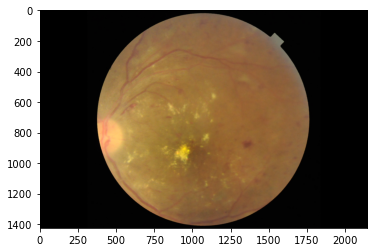

In [9]:
image = cv2.imread(pathTrain + '/' + dirsTrain[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
print(image.shape)

In [10]:
def reescaleImg(image):
    (h, w) = image.shape[:2]
    r = IMG_WIDTH / float(w) #Se calcula la relación de aspecto
    dim = (IMG_WIDTH, int(h * r))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(image, dim, cv2.INTER_AREA) #INTER_AREA es el método de interpolación
    return resized

(170, 256, 3)


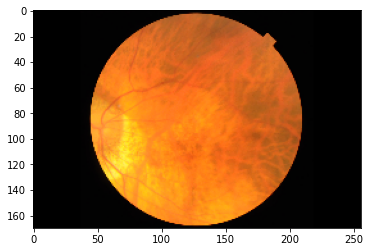

In [138]:
print(resized.shape)
plt.imshow(reescaleImg(image))

1000.png


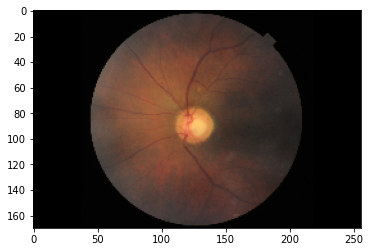

In [14]:
res = reescaleImg(cv2.imread(pathTrain + '/' + dirsTrain[3]))
# cv2.imwrite(pathDestino + '/22w432.png', cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
# res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(res)
print(dirsTrain[3])

Ejecutamos un bucle donde recorremos todos los archivos de la ruta y le aplicamos la función de reescalado que he creado más arriba.

In [137]:
#Path Train
for img in dirsTrain:
    res = reescaleImg(cv2.imread(pathTrain + '/' + img))
    cv2.imwrite(pathTrain_D + '/' + img, cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [18]:
#Path Test
for img in dirsTest:
    res = reescaleImg(cv2.imread(pathTest + '/' + img))
    cv2.imwrite(pathTest_D + '/' + img, cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [19]:
#Path Validación
for img in dirsVal:
    res = reescaleImg(cv2.imread(pathVal + '/' + img))
    cv2.imwrite(pathVal_D + '/' + img, cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

Una ver terminado podemos ver que ahora el conjunto de entrenamiento ocupa 87.5 Mb. Para el conjunto de test y validación hemos pasado de 1.62Gb a 30 Mb.